# Modelado
Utilizaremos diferentes algoritmos de regresion que resultan utiles para datos con variables numericas y optaremos por quedarnos con el mejor.

### Algoritmos: 
    - Suport Vector Regression (SVR)

    - Random Forest Regression

    - Desicion Tree Regression
    
### Metricas:

    - mean_square_error
    - r^2score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


/opt/anaconda3/envs/machine_learnig_gomila/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data=pd.read_csv('../data/processed/df_clear.csv')
data.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,0


In [4]:
np.random.seed(23)

x = data.drop(columns='Age').values
y = data.Age.values 
y=y.reshape(-1,1)

In [6]:
# scalado de variables
sc_x = StandardScaler()
sc_y = StandardScaler()

X = sc_x.fit_transform(x)
Y = sc_y.fit_transform(y)

In [7]:
# division de datos train y test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=19)
x_train.shape[0],x_test.shape[0]

(2908, 728)

# Support Vector Regression

In [48]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train.ravel())

SVR()

In [34]:
predit=regressor.predict(x_train)

In [39]:
print('R_cuadrado: {}'.format(r2_score(y_train,predit)) + '\nError Cuadratico Medio:',mean_squared_error(y_train,predit))

R_cuadrado: 0.5888589973293494
Error Cuadratico Medio: 0.405476698031485


In [41]:
## validacion
predit=regressor.predict(x_test)
print('R_cuadrado: {}'.format(r2_score(y_test,predit)) + '\nError Cuadratico Medio:',mean_squared_error(y_test,predit))

R_cuadrado: 0.5457284632242023
Error Cuadratico Medio: 0.47925780054663897


- No Presentamos problemas de overfiting pero las metricas no resultan muy favorables.

In [42]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {
    "C": [0.1, 1, 10, 100],            # Regularización
    "kernel": ["linear", "rbf", "poly"], # Tipos de kernel
    "gamma": ["scale", "auto", 0.01, 0.1, 1],  # Solo para 'rbf' y 'poly'
    "epsilon": [0.1, 0.2, 0.5, 1.0]    # Margen de tolerancia
}
gs_svr = GridSearchCV(regressor,param_grid,scoring='r2',cv=5,n_jobs=-1)

In [46]:
gs_svr.fit(x_train,y_train.ravel()) # lo correremos en kaggle

/opt/anaconda3/envs/machine_learnig_gomila/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/machine_learnig_gomila/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/machine_learnig_gomila/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/machine_learnig_gomila/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConve

KeyboardInterrupt: 

# Random Forest Regression

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train.ravel())

RandomForestRegressor()

In [71]:
predit=regressor.predict(x_train)
print('R_cuadrado: {}'.format(r2_score(y_train,predit)) + '\nError Cuadratico Medio:',mean_squared_error(y_train,predit))

R_cuadrado: 0.9366722840880306
Error Cuadratico Medio: 0.06245524765242376


In [72]:
predit=regressor.predict(x_test)
print('R_cuadrado: {}'.format(r2_score(y_test,predit)) + '\nError Cuadratico Medio:',mean_squared_error(y_test,predit))

R_cuadrado: 0.5390668778876895
Error Cuadratico Medio: 0.4862857925691868


- presentamos problemas de overfing, es decir predice bastante bien con los datos de entrenamiento pero no con los de validacion.

# Redes Neuronales

In [92]:

from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1
from tensorflow.keras.metrics import R2Score

In [93]:
# aquitectura
modelo = Sequential()
modelo.add(Dense(32,input_dim=x_train.shape[1], activation='relu'))
modelo.add(Dense(1,activation='linear'))
modelo.compile(optimizer='adam', loss='mean_squared_error',metrics=[R2Score()])

/opt/anaconda3/envs/machine_learnig_gomila/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
modelo.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
## entrenamiento
history = modelo.fit(x_train,y_train,epochs=50,validation_split=0.2,batch_size=20)

Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8713 - r2_score: 0.1202 - val_loss: 0.5221 - val_r2_score: 0.4144
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 0.5340 - r2_score: 0.4664 - val_loss: 0.4732 - val_r2_score: 0.4692
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 0.5231 - r2_score: 0.4941 - val_loss: 0.4590 - val_r2_score: 0.4851
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.5057 - r2_score: 0.5088 - val_loss: 0.4611 - val_r2_score: 0.4827
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 0.4873 - r2_score: 0.5038 - val_loss: 0.4467 - val_r2_score: 0.4989
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 0.4772 - r2_score: 0.5396 - val_loss: 0.4408 - val_r2_score: 0.5055
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.4742 - r2_score: 0.5340 - val_loss: 0.4381 - val_r2_score: 0.5086
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4834 - r2_score: 0.5274 - val_

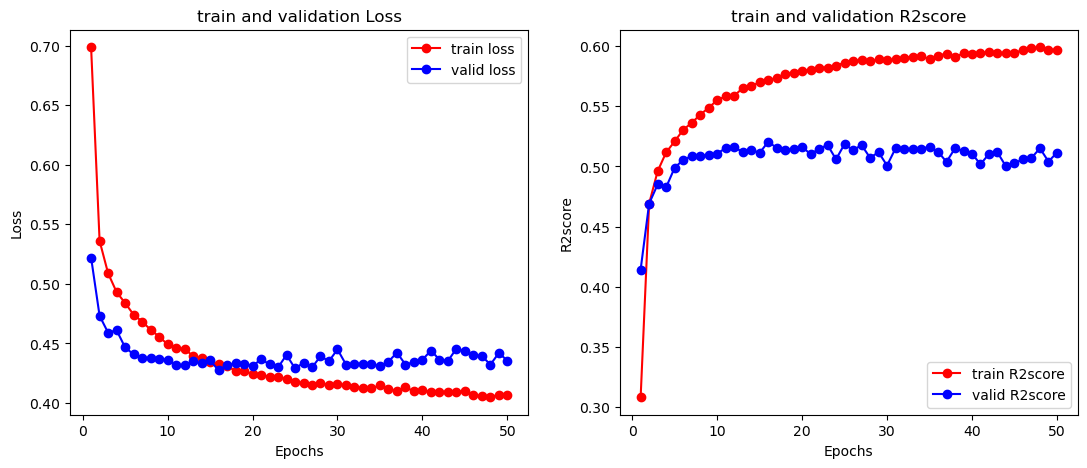

In [101]:
def history_curves(history):
    plt.figure(figsize=(13,5))

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = np.arange(1,len(train_loss)+1)
    # graph loss
    plt.subplot(1,2,1)
    plt.plot(epochs,train_loss,'ro-',label="train loss")
    plt.plot(epochs,val_loss,'bo-',label="valid loss")
    plt.legend()
    plt.title('train and validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    train_r2 = history.history['r2_score']
    val_r2 = history.history['val_r2_score']
    # graph mae
    plt.subplot(1,2,2)
    plt.plot(epochs,train_r2,'ro-',label="train R2score")
    plt.plot(epochs,val_r2 ,'bo-',label="valid R2score")
    plt.legend()
    plt.title('train and validation R2score')
    plt.xlabel('Epochs')
    plt.ylabel('R2score')
    plt.show()
history_curves(history)

In [102]:
# Evaluacion del modelo
r2_score = modelo.evaluate(x_test, y_test)
print("Mean Squared Error:", r2_score)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4703 - r2_score: 0.5515 
Mean Squared Error: [0.4710101783275604, 0.5535460710525513]
